In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
def func(x,y):
    return 100*x*np.exp((-0.5*x**2)+(0.5*x)-(0.5*y**2)-y+np.pi)

def func_dx(x,y):
    return (100*np.exp((-0.5*x**2)+(0.5*x)-(0.5*y**2)-y+np.pi)*(1+x*(-x+0.5)))
    
def func_dy(x,y):
    return (100*x*math.exp((-0.5*x**2)+(0.5*x)-(0.5*y**2)-y+math.pi)*(-y-1))

In [3]:
def contour_plt(xrange,yrange):
    
    X,Y=np.meshgrid(xrange,yrange)
    
    Z = func(X,Y)
    
    plt.figure(figsize=(10,10))
    CS = plt.contour(X,Y,Z, 15, linewidths=0.5, colors='k')
    CS = plt.contourf(X,Y,Z, 15,
                      vmax=abs(Z).max(), vmin=-abs(Z).max())
    plt.colorbar()  # draw colorbar
    # plot data points.
    plt.scatter(X,Y, marker='o', s=5, zorder=10)
    plt.xlim(-2, 4)
    plt.ylim(-3, 2)
    plt.show()

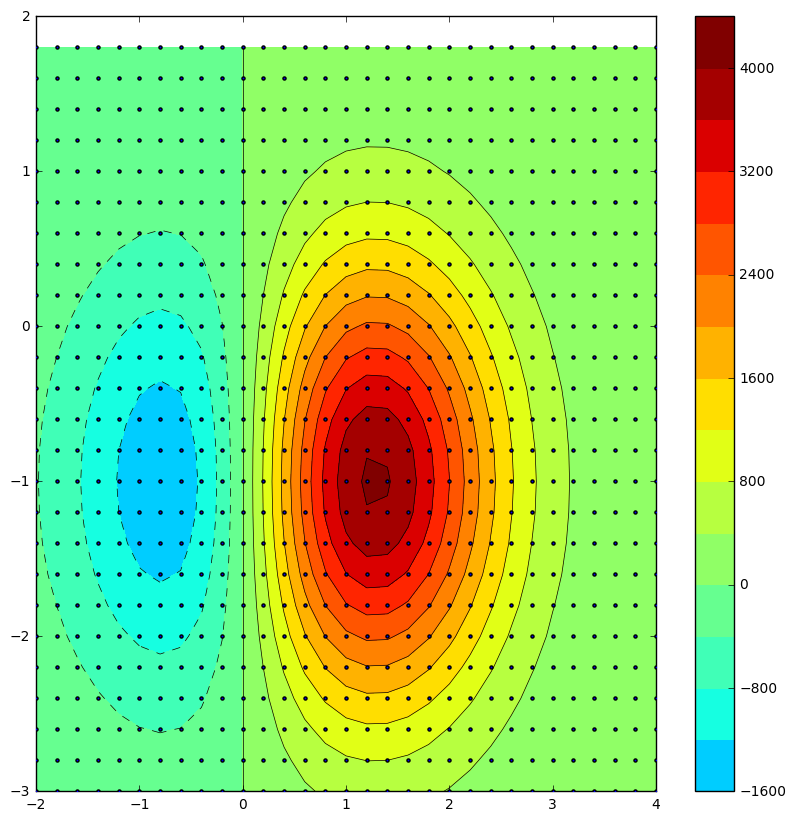

In [4]:
xrange=np.arange(-2,5,0.2)
yrange=np.arange(-3,2,0.2)
#np.meshgrid(xrange,yrange)
contour_plt(xrange,yrange)

In [10]:
def SGD(init_x,init_y,iterations,lr=0.0001):
    x=init_x
    y=init_y
    cost=[]
    x_path=[]
    y_path=[]
    for i in range(iterations):
        cost.append(func(x,y))
        x_path.append(x)
        y_path.append(y)
        dx=func_dx(x,y)
        dy=func_dy(x,y)
        x=x-lr*dx
        y=y-lr*dy
        
    SGD_Dict={'cost':cost,
              'x_path':x_path,
             'y_path':y_path}
    return SGD_Dict

In [18]:
def Momentum(init_x,init_y,iterations,beta=0.9,lr=0.0001):
    x=init_x
    y=init_y
    cost=[]
    x_path=[]
    y_path=[]
    dx=dy=0
    for i in range(iterations):
        cost.append(func(x,y))
        x_path.append(x)
        y_path.append(y)
        dx=beta*dx+(1-beta)*func_dx(x,y)
        dy=beta*dy+(1-beta)*func_dy(x,y)
        x=x-lr*dx
        y=y-lr*dy
    
    Momentum_Dict={'cost':cost,
              'x_path':x_path,
             'y_path':y_path}
    return Momentum_Dict

In [22]:
def RMSProp(init_x,init_y,iterations,beta=0.9,lr=0.0001,adaptive=True,epsilon=1e-9):
    x=init_x
    y=init_y
    cost=[]
    x_path=[]
    y_path=[]
    V_dx=V_dy=0
    for i in range(iterations):
        cost.append(func(x,y))
        if(adaptive):
            lr=lr*(1/(1+i*0.5))
        x_path.append(x)
        y_path.append(y)
        dx=func_dx(x,y)
        dy=func_dy(x,y)        
        V_dx=beta*V_dx+(1-beta)*(dx**2)
        V_dy=beta*V_dy+(1-beta)*(dy**2)
        x=x-lr*dx/(np.sqrt(V_dx)+epsilon)
        y=y-lr*dy/(np.sqrt(V_dy)+epsilon)
    
    RMSProp_Dict={'cost':cost,
              'x_path':x_path,
             'y_path':y_path}
    return RMSProp_Dict

In [25]:
def Adam(init_x,init_y,iterations,beta=0.9,beta2=0.99,lr=0.0001,epsilon=1e-9):
    x=init_x
    y=init_y
    cost=[]
    x_path=[]
    y_path=[]
    V_dx=V_dy=S_dx=S_dy=0
    for i in range(iterations):
        cost.append(func(x,y))
        x_path.append(x)
        y_path.append(y)
        dx=func_dx(x,y)
        dy=func_dy(x,y) 
        V_dx=beta*V_dx+(1-beta)*dx
        V_dy=beta*V_dy+(1-beta)*dy
        S_dx=beta2*S_dx+(1-beta2)*dx**2
        S_dy=beta2*S_dy+(1-beta2)*dy**2
        
        V_dx_corrected=V_dx/(1-(beta**(i+1)))
        V_dy_corrected=V_dy/(1-(beta**(i+1)))
        
        S_dx_corrected=S_dx/(1-(beta2**(i+1)))
        S_dy_corrected=S_dy/(1-(beta2**(i+1)))
        
        x=x-lr*V_dx_corrected/(np.sqrt(S_dx_corrected)+epsilon)
        y=y-lr*V_dy_corrected/(np.sqrt(S_dy_corrected)+epsilon)

    Adam_Dict={'cost':cost,
              'x_path':x_path,
             'y_path':y_path}
    return Adam_Dict

In [158]:
SGD_Results=SGD(0,5,5000,0.01)
Momentum_Results=Momentum(0,5,5000,0.9,0.01)
RMSProp_Results=RMSProp(0,5,5000,0.9,0.01,False)
Adam_Results=Adam(0,5,5000,0.9,0.99,0.01)

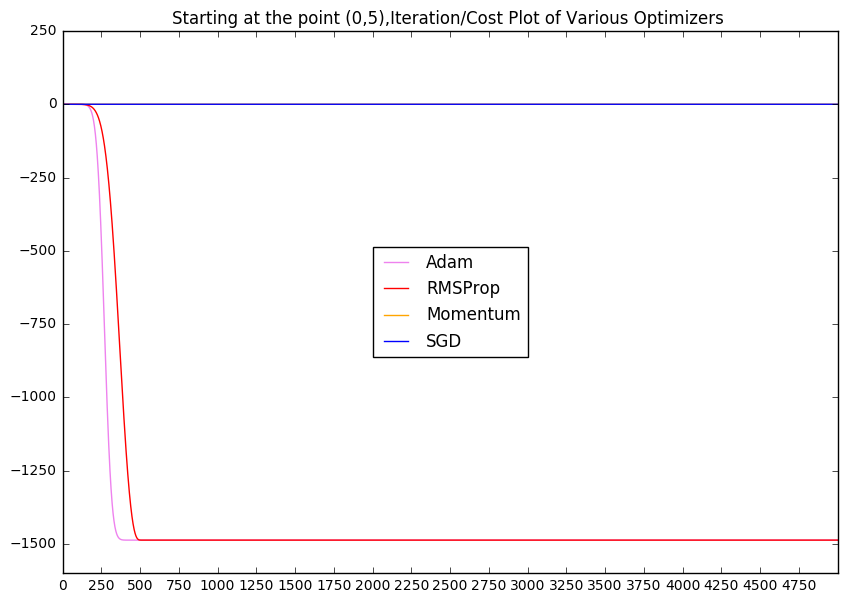

In [159]:
plt.figure(figsize=(10,7))
plt.plot(range(5000),Adam_Results['cost'],c='violet',label="Adam")
plt.plot(range(5000),RMSProp_Results['cost'],c='red',label="RMSProp")
plt.plot(range(5000),Momentum_Results['cost'],c='orange',label="Momentum")
plt.plot(range(5000),SGD_Results['cost'],c='blue',label="SGD")
plt.xticks(np.arange(0,5000,250))
plt.yticks(np.arange(250,-1600,-250))
plt.legend(loc='center')
plt.title("Starting at the point (0,5),Iteration/Cost Plot of Various Optimizers ")
plt.show()

In [160]:
SGD_Results=SGD(1.5,-1.5,5000,0.00001)
Momentum_Results=Momentum(1.5,-1.5,5000,0.9,0.00001)
RMSProp_Results=RMSProp(1.5,-1.5,5000,0.9,0.001,False)
Adam_Results=Adam(1.5,-1.5,5000,0.9,0.99,0.001)

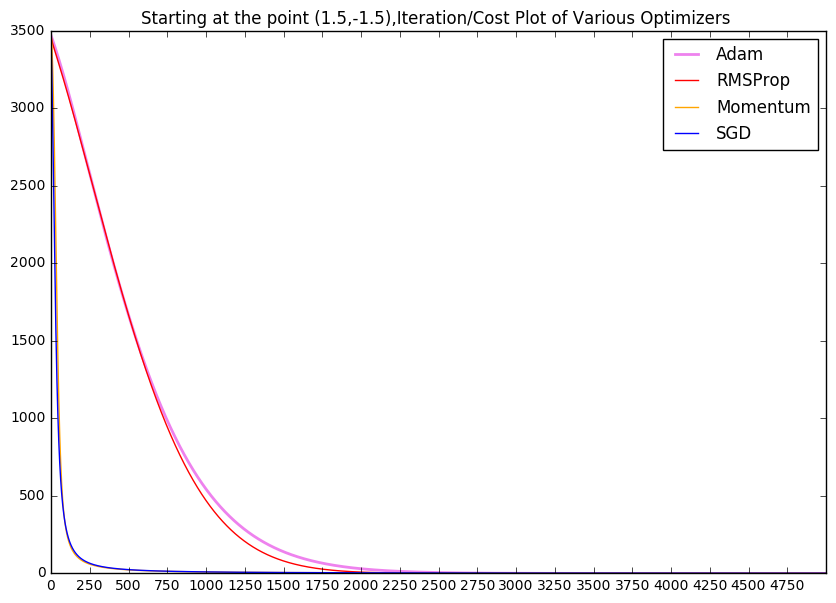

In [161]:
plt.figure(figsize=(10,7))
plt.plot(range(5000),Adam_Results['cost'],c='violet',label="Adam",linewidth=2)
plt.plot(range(5000),RMSProp_Results['cost'],c='red',label="RMSProp")
plt.plot(range(5000),Momentum_Results['cost'],c='orange',label="Momentum")
plt.plot(range(5000),SGD_Results['cost'],c='blue',label="SGD")
plt.xticks(np.arange(0,5000,250))
plt.legend(loc='upper right')
plt.title("Starting at the point (1.5,-1.5),Iteration/Cost Plot of Various Optimizers ")
plt.show()